In [1]:
import nidaqmx
from nidaqmx.constants import AcquisitionType, Edge
import time
import matplotlib.pyplot as plt

### "with-as"

In [99]:
with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan('/PXI-6363/ai16')
    
    task.timing.cfg_samp_clk_timing(
        rate=1000,
        source='/PXI-6363/PFI12',
        sample_mode=AcquisitionType.CONTINUOUS,
        samps_per_chan=1000
    )
    
    task.start()
    time.sleep(10)
    print(task.read(number_of_samples_per_channel=3))
    task.stop()
    task.close()

[-0.9973490847518327, -0.7715744932801534, -0.24771981960662606]


C:\Anaconda\lib\site-packages\nidaqmx\task.py:463: ResourceWarning: Attempted to close NI-DAQmx task of name "_unnamedTask<60>" but task was already closed.
  'already closed.'.format(self._saved_name), DaqResourceWarning)


### Without "with-as"

In [115]:
task = nidaqmx.Task()

task.ai_channels.add_ai_voltage_chan('/PXI-6363/ai16')
    
task.timing.cfg_samp_clk_timing(
    rate=1000,
    source='/PXI-6363/PFI12',
    sample_mode=AcquisitionType.CONTINUOUS,
    samps_per_chan=1000
)

task.start()

In [17]:
task.read(number_of_samples_per_channel=10)

[-0.9970270096383731,
 -0.9979932349795874,
 -0.9968659720817477,
 -0.9976711598655706,
 -0.9973490847518327,
 -0.9968659720817477,
 -0.9975101223086669,
 -0.982050517168403,
 -0.9825336298194237,
 -0.9826946673699009]

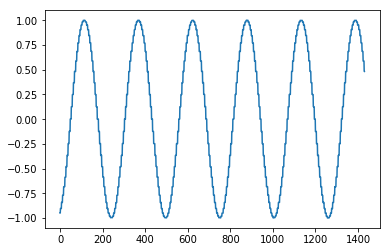

In [112]:
plt.plot(task.read(number_of_samples_per_channel=nidaqmx.constants.READ_ALL_AVAILABLE))
plt.show()

In [116]:
task.stop()
task.close()

In [15]:
nidaqmx.constants.READ_ALL_AVAILABLE

-1